# Visualizing and Analyzing Displacement Data

In [2]:
import pandas as pd

In [3]:
data = pd.read_excel("./data/IDMC_GIDD_Disasters_Internal_Displacement_Data.xlsx")
data

,ISO3,Country / Territory,Year,Event Name,Date of Event (start),Disaster Internal Displacements,Disaster Internal Displacements (Raw),Hazard Category,Hazard Type,Hazard Sub Type
0,SDN,Sudan,2018,Sudan: Flood - 14 states - 07/05/2018,2018-05-07,121000,120756,Weather related,Flood,Flood
1,ETH,Ethiopia,2019,Ethiopia: Flood - SNNP - 01/04/2019,2019-04-01,5600,5600,Weather related,Flood,Flood
2,ETH,Ethiopia,2019,Ethiopia: Flood - 6 states - 01/05/2019,2019-05-01,190000,190377,Weather related,Flood,Flood
3,ETH,Ethiopia,2019,Ethiopia: Flood - Amhara - 01/08/2019,2019-08-01,2,2,Weather related,Flood,Flood
4,ETH,Ethiopia,2019,Ethiopia: Flood - 5 regions - 23/09/2019,2019-09-23,177000,177431,Weather related,Flood,Flood
...,...,...,...,...,...,...,...,...,...,...
97,ETH,Ethiopia,2017,Ethiopia: Flood - Amhara - 01/07/2017,2017-07-01,140,135,Weather related,Flood,Flood
98,ETH,Ethiopia,2017,Ethiopia: Flood - Amhara - 01/07/2017,2017-07-01,120,115,Weather related,Flood,Flood
99,ETH,Ethiopia,2017,"Ethiopia: Flood - Afar, Oromia - 08/09/2017",2017-09-08,36000,36350,Weather related,Flood,Flood
100,SOM,Somalia,2018,Somalia: Flood - 9 regions - 15/04/2018,2018-04-15,289000,289176,Weather related,Flood,Flood


In [6]:
data["Country / Territory"].value_counts()

Country / Territory
Ethiopia    48
Somalia     33
Sudan       21
Name: count, dtype: int64

In [5]:
# Dam release?
data["Hazard Sub Type"].value_counts()

Hazard Sub Type
Flood    102
Name: count, dtype: int64

In [5]:
data.loc[
    data["ISO3"] == "SDN", ["Date of Event (start)", "Disaster Internal Displacements"]
].sort_values("Date of Event (start)")

,Date of Event (start),Disaster Internal Displacements
42,2008-08-01,39000
41,2008-11-24,7500
44,2009-01-01,80000
48,2010-01-01,10000
47,2010-01-01,10000
51,2011-08-01,19000
53,2012-01-01,84000
56,2013-08-01,284000
62,2014-07-25,33000
63,2014-08-10,154000


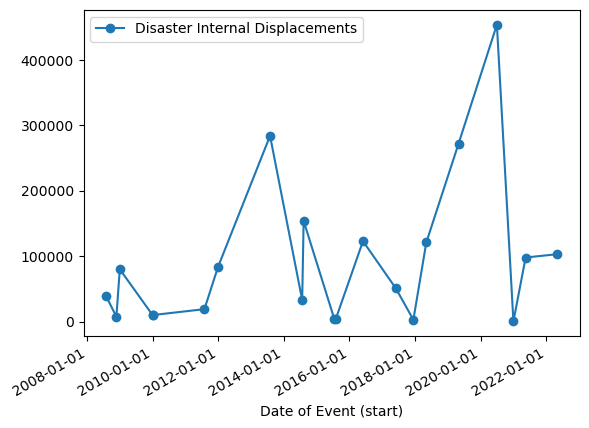

In [6]:
import matplotlib.ticker as mticker
import matplotlib.dates as mdates

ax = data.loc[data["ISO3"] == "SDN", :].plot(
    x="Date of Event (start)", y="Disaster Internal Displacements", marker="o",
)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))

(0.0, 530249.9)

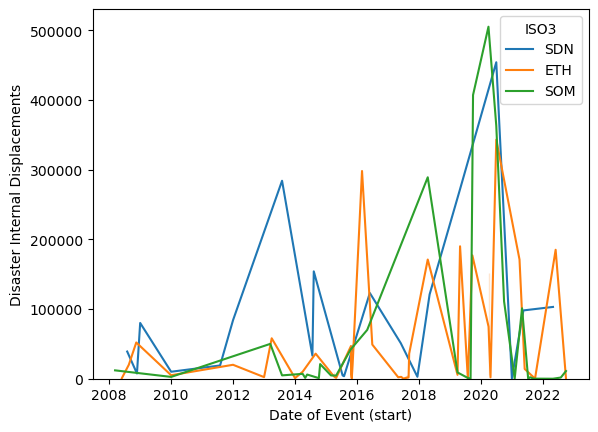

In [5]:
import seaborn as sns

ax = sns.lineplot(
    data=data,
    x="Date of Event (start)",
    y="Disaster Internal Displacements",
    hue="ISO3",
)
ax.set_ylim(bottom=0)
# ax.set_yscale("log")

In [6]:
# All impacts per year
data.set_index("Date of Event (start)")["Disaster Internal Displacements"].resample("1y").sum()

Date of Event (start)
2008-12-31     131310
2009-12-31      80000
2010-12-31      35200
2011-12-31      19000
2012-12-31     104000
2013-12-31     399100
2014-12-31     269920
2015-12-31     154740
2016-12-31     540000
2017-12-31     105970
2018-12-31     581000
2019-12-31    1060684
2020-12-31    2076700
2021-12-31     386843
2022-12-31     301361
Freq: A-DEC, Name: Disaster Internal Displacements, dtype: int64

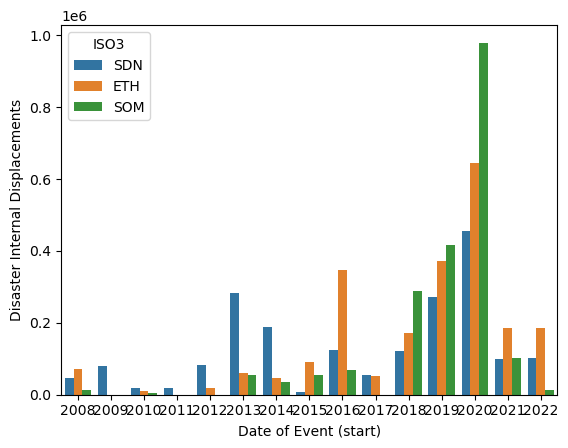

In [7]:
# Group by country
data_resample_1y = (
    data.set_index("Date of Event (start)")
    .groupby("ISO3")["Disaster Internal Displacements"]
    .resample("1y")
    .sum()
    .reset_index()
)
data_resample_1y["Date of Event (start)"] = data_resample_1y[
    "Date of Event (start)"
].dt.year
ax = sns.barplot(
    data_resample_1y,
    x="Date of Event (start)",
    y="Disaster Internal Displacements",
    hue="ISO3",
    hue_order=["SDN", "ETH", "SOM"],
)
# ax.set_yscale("log")

In [8]:
for name, group in data_resample_1y.set_index("Date of Event (start)").groupby("ISO3"):
    print(name, group["Disaster Internal Displacements"])

ETH Date of Event (start)
2008     72810
2009         0
2010     10000
2011         0
2012     20000
2013     60300
2014     46880
2015     90540
2016    347000
2017     52170
2018    171000
2019    372602
2020    643700
2021    185160
2022    185600
Name: Disaster Internal Displacements, dtype: int64
SDN Date of Event (start)
2008     46500
2009     80000
2010     20000
2011     19000
2012     84000
2013    284000
2014    187000
2015      8300
2016    123000
2017     53800
2018    121000
2019    272000
2020    454000
2021     98330
2022    103000
Name: Disaster Internal Displacements, dtype: int64
SOM Date of Event (start)
2008     12000
2009         0
2010      5200
2011         0
2012         0
2013     54800
2014     36040
2015     55900
2016     70000
2017         0
2018    289000
2019    416082
2020    979000
2021    103353
2022     12761
Name: Disaster Internal Displacements, dtype: int64
